In [286]:
#Starter code provided by instructor
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Total_Study_Data = pd.DataFrame.merge(study_results ,mouse_metadata, on =  'Mouse ID')
# Display the data table for preview
Total_Study_Data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [287]:
# Total number of mice
Total_Mice = Total_Study_Data['Mouse ID'].nunique()
Total_Mice

249

In [288]:
# Finding duplicate entries, have the dame Mouse ID & Timepoint 
duplicate = Total_Study_Data[Total_Study_Data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [289]:
# All entries for the duplicate mouse ID
duplicate_entries = Total_Study_Data.loc[Total_Study_Data['Mouse ID'] == 'g989']
duplicate_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [290]:
# Dropping mouse that has duplicate entries
Clean_Study_Data = Total_Study_Data

index_names = Clean_Study_Data[Clean_Study_Data['Mouse ID'] == 'g989' ].index 
Clean_Study_Data.drop(index_names, inplace = True) 

In [291]:
# Total number of mice, clean df
Total_Mice_Clean_Data = Clean_Study_Data['Mouse ID'].nunique()
Total_Mice_Clean_Data

248

In [292]:
# Getting Mean, Median, Variance, Standard Deviation, and SEM for each Drug Regimen
Avg_Tumor_Vol = Clean_Study_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Med_Tumor_Vol = Clean_Study_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Var_Tumor_Vol = Clean_Study_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Std_Tumor_Vol = Clean_Study_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
Sem_Tumor_Vol = Clean_Study_Data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#Creating a Group Drug df with the series created above
Group_Drug_df = pd.DataFrame({'Mean Tumor Volume' : Avg_Tumor_Vol,
                              'Median Tumor Volume' : Med_Tumor_Vol,
                              'Tumor Volume Variance' : Var_Tumor_Vol,
                              'Tumor Volume Std. Dev.' : Std_Tumor_Vol,
                              'Tumor Volume Std. Err.' : Sem_Tumor_Vol,
                             })
Group_Drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [293]:
# Using the aggregation method Mean, Median, Variance, Standard Deviation, and SEM for each Drug Regimen
Agg_df = (Clean_Study_Data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([('mean','mean'),
                                                                             ('median','median'),
                                                                             ('var','var'),
                                                                             ('std','std'),
                                                                             ('sem','sem'),
                                                                            ]))
Agg_df = pd.DataFrame(Agg_df)
Agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


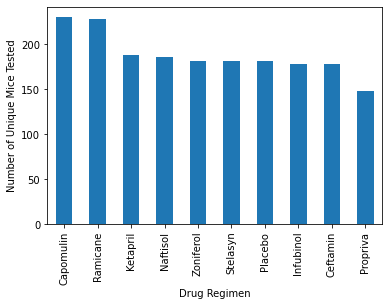

In [295]:
#Unique mice tested on each drug regimen using pandas
Pandas_Drug_Group = Clean_Study_Data.groupby('Drug Regimen')
Pandas_Bar_Chart = Pandas_Drug_Group['Timepoint'].count().sort_values(ascending=False)

Pandas_Bar_Chart.to_frame() 

Pandas_Bar_Chart.plot(kind="bar", figsize=(6,4))

plt.ylabel('Number of Unique Mice Tested')
plt.show()

In [296]:
#Creating bar chart grouped data, summing # of entries, and sorting larget to small
Plt_Bar_Group = Clean_Study_Data.groupby('Drug Regimen')
Plt_Entry_Count = Plt_Bar_Group['Timepoint'].count().sort_values(ascending=False)

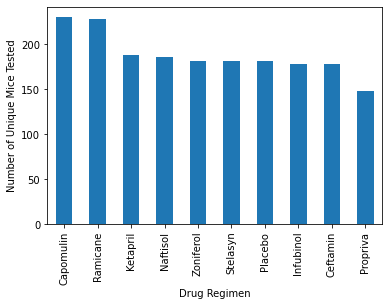

In [297]:
#Creating the bar chart with label names
Plt_Bar_Chart = Plt_Entry_Count.plot(kind='bar')

Plt_Bar_Chart.set_xlabel('Drug Regimen')
Plt_Bar_Chart.set_ylabel('Number of Unique Mice Tested')

plt.show()

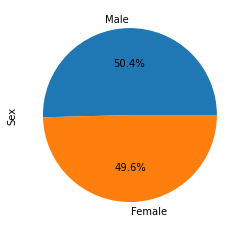

In [298]:
#Female versus Male mice, pandas
Pandas_Mouse_Group = Clean_Study_Data.groupby(['Mouse ID', 'Sex']).count().reset_index()

Sex_Count = Pandas_Mouse_Group['Sex'].value_counts()

Pandas_Pie = Sex_Count.plot(kind="pie", y='tripduration', autopct='%1.1f%%')
plt.show()

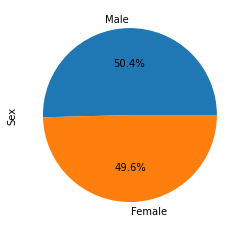

In [299]:
#Female versus Male mice, pyplot
plt.pie(Sex_Count, labels=Sex_Count.index, autopct="%1.1f%%");
plt.ylabel('Sex') ;

In [301]:
#Gettin a df with the last timepoint for each mouse
Last_Time_Point = Clean_Study_Data.loc[Clean_Study_Data.groupby('Mouse ID').Timepoint.idxmax()]
Last_Time_Point.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
907,a203,45,67.973419,2,Infubinol,Female,20,23
289,a251,45,65.525743,1,Infubinol,Female,21,25
1134,a262,45,70.717621,4,Placebo,Female,17,29
1487,a275,45,62.999356,3,Ceftamin,Female,20,28
736,a366,30,63.440686,1,Stelasyn,Female,16,29


In [302]:
#Code provided by instructor
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = Last_Time_Point.loc[Last_Time_Point["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


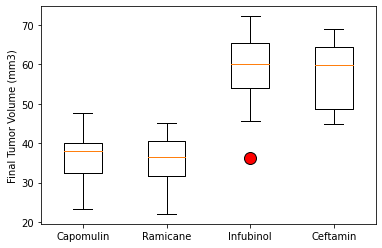

In [304]:
#Box plot of final tumor volume
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

In [310]:
#Getting df for mouse l509
mouse_l509 = Clean_Study_Data[Clean_Study_Data['Mouse ID'] == 'l509']
mouse_l509.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1721,l509,0,45.000000,0,Capomulin,Male,17,21
1722,l509,5,45.851193,0,Capomulin,Male,17,21
1723,l509,10,46.759074,0,Capomulin,Male,17,21
1724,l509,15,47.488599,1,Capomulin,Male,17,21
1725,l509,20,48.070452,2,Capomulin,Male,17,21


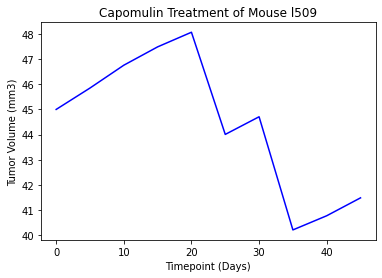

In [311]:
#Show line plot of tumor volume vs timepoint for mouse l509
l509 = plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'], color="blue")

plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [313]:
#Creating a df for Capomulin
Capomulin_df = Clean_Study_Data[Clean_Study_Data['Drug Regimen'] == 'Capomulin']
Capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [314]:
# Getting Mean for Capomulin by Timepoint
Cap_Avg = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Mouse_Weight = Capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

#Creating a Group Drug df with the series created above
Cap_df = pd.DataFrame({'Mean Tumor Volume' : Cap_Avg,
                       'Mouse Weight' : Mouse_Weight
                             })
Cap_df.head(5)

,Mean Tumor Volume,Mouse Weight
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


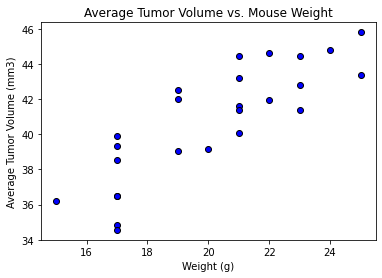

In [315]:
#Creating a scatter plot for tumor volume vs mouse weight for the Capomulin
plt.scatter(Cap_df['Mouse Weight'], Cap_df['Mean Tumor Volume'], marker="o", facecolors="blue", edgecolors="black")

plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

The correlation between mouse weight and the average tumor volume is 0.8419363424694718


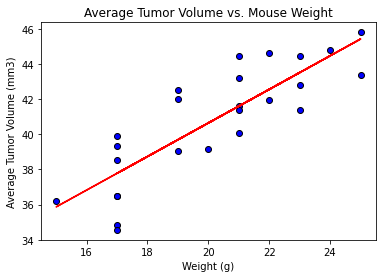

In [319]:
# Add the linear regression equation and line to plot
x_values = Cap_df['Mouse Weight']
y_values = Cap_df['Mean Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()